# Predicting CO2 Emission of Cars

In this notebbok, we'll use Linear regression model to predict the co2 emission by cars.

In [27]:
#Let's import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

We have a csv data file. We'll import it in a dataframe.

In [28]:
df = pd.read_csv("vehicle_data.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


First we need to clean the data. For that look if there are any empty cells or missing values.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


There are 1066 rows, all of which are non-null for all the labels. 
So we don't need to drop any rows.

In [30]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


This are the numeric valued labels.
Let's use them as independent variables.

In [31]:
num_cols=['VEHICLECLASS','ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']
X = df[num_cols]
X.head(10)

,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,COMPACT,2.0,4,9.9,6.7,8.5,196
1,COMPACT,2.4,4,11.2,7.7,9.6,221
2,COMPACT,1.5,4,6.0,5.8,5.9,136
3,SUV - SMALL,3.5,6,12.7,9.1,11.1,255
4,SUV - SMALL,3.5,6,12.1,8.7,10.6,244
5,MID-SIZE,3.5,6,11.9,7.7,10.0,230
6,MID-SIZE,3.5,6,11.8,8.1,10.1,232
7,MID-SIZE,3.7,6,12.8,9.0,11.1,255
8,MID-SIZE,3.7,6,13.4,9.5,11.6,267
9,COMPACT,2.4,4,10.6,7.5,9.2,212


## EDA
now let's perform some exploratory data analysis on our data.
for that let's get relaion bw different labels and y, i.e. emission

In [32]:
X.corr(numeric_only=True)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,1.000000


In [33]:
X.CYLINDERS.value_counts()

4     420
6     356
8     252
12     17
10      9
5       9
3       4
Name: CYLINDERS, dtype: int64

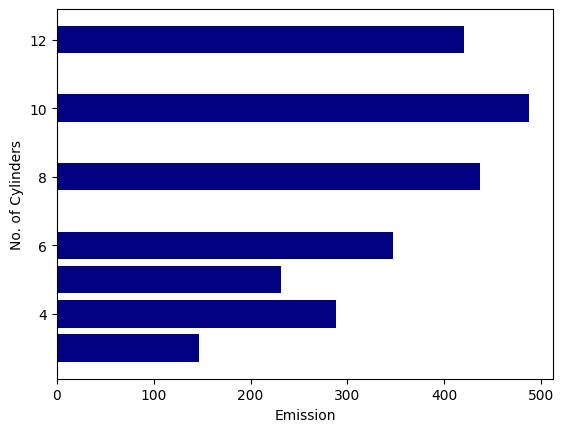

In [34]:
#plt.scatter(X.CYLINDERS, X.CO2EMISSIONS, color='aqua', label='scatter')
plt.barh(X.CYLINDERS, X.CO2EMISSIONS, color='navy')
plt.xlabel('Emission')
plt.ylabel('No. of Cylinders')
plt.show()

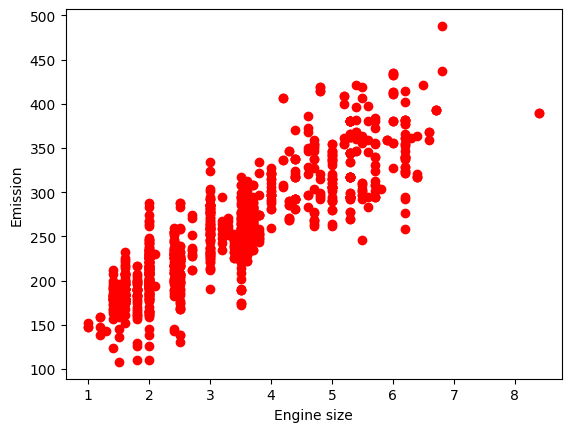

In [35]:
plt.scatter(X.ENGINESIZE, X.CO2EMISSIONS, color='red')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

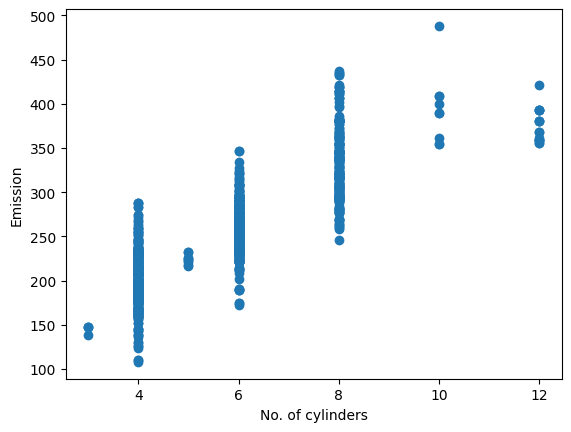

In [36]:
plt.scatter(X.CYLINDERS, X.CO2EMISSIONS)
plt.xlabel('No. of cylinders')
plt.ylabel('Emission')
plt.show()

In [37]:
#let's check the percentage of different vehicle classes
veh_counts=df.VEHICLECLASS.value_counts()
veh_counts.head()

MID-SIZE          178
COMPACT           172
SUV - SMALL       154
SUV - STANDARD    110
FULL-SIZE          86
Name: VEHICLECLASS, dtype: int64

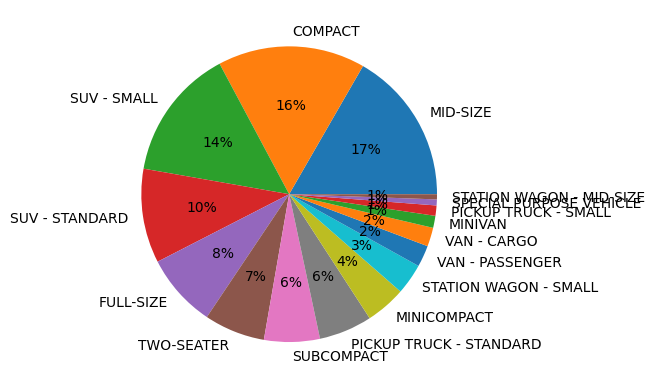

In [38]:
plt.pie(veh_counts.values, labels=veh_counts.index,autopct='%0.f%%')
plt.show()

It is clear from the pie chart above, that the Mid-size cars have the most percentage in the dataset.

Now we'll check the dependence of vehicle class on its emisson.

In [39]:
veh_class=pd.DataFrame(df.groupby('VEHICLECLASS')['CO2EMISSIONS'].mean())
veh_class.sort_values(by=['CO2EMISSIONS'], ascending=False)

,CO2EMISSIONS
VEHICLECLASS,
VAN - PASSENGER,401.000000
VAN - CARGO,361.500000
PICKUP TRUCK - STANDARD,309.096774
SUV - STANDARD,307.672727
PICKUP TRUCK - SMALL,284.250000
FULL-SIZE,267.651163
TWO-SEATER,265.676056
MINIVAN,260.142857
SUBCOMPACT,252.615385


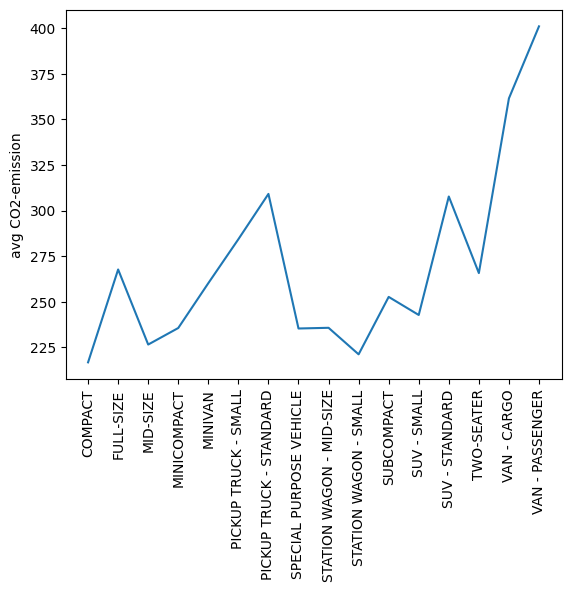

In [40]:
#To check the dependence
plt.plot(veh_class.index, veh_class.values)
#plt.xlabel('Car-class')
plt.ylabel('avg CO2-emission')
plt.xticks(rotation='vertical')
plt.show()

As we can see, the Emission varies depending on the VEHICLECLASS

In [41]:
#clas=pd.DataFrame(df.groupby('VEHICLECLASS')['CO2EMISSIONS'].mean())
veh_class.rename(columns = {'CO2EMISSIONS':'CAR_CLASS'}, inplace = True)
veh_class.head()

,CAR_CLASS
VEHICLECLASS,
COMPACT,216.715116
FULL-SIZE,267.651163
MID-SIZE,226.483146
MINICOMPACT,235.553191
MINIVAN,260.142857


Now let's create a new column to add to X, to show dependence of emission on vehicle class

In [42]:
X=X.merge(veh_class, on='VEHICLECLASS')

In [43]:
X.drop('VEHICLECLASS',axis=1,inplace=True)
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS,CAR_CLASS
0,2.0,4,9.9,6.7,8.5,196,216.715116
1,2.4,4,11.2,7.7,9.6,221,216.715116
2,1.5,4,6.0,5.8,5.9,136,216.715116
3,2.4,4,10.6,7.5,9.2,212,216.715116
4,2.4,4,11.2,8.1,9.8,225,216.715116
...,...,...,...,...,...,...,...
1062,4.0,6,14.5,11.3,13.1,301,284.250000
1063,2.7,4,13.1,10.5,11.9,274,284.250000
1064,2.7,4,12.8,10.6,11.8,271,284.250000
1065,4.0,6,14.7,11.5,13.3,306,284.250000


We've successfully converted VehicleClass feature to it's numerical value column

Nowlet's split the dataframe for testing and training

In [44]:
Y = X.CO2EMISSIONS
X.drop('CO2EMISSIONS',axis=1,inplace=True)
Y.head(10)

0    196
1    221
2    136
3    212
4    225
5    239
6    202
7    230
8    214
9    262
Name: CO2EMISSIONS, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.25)
xtrain.shape, ytrain.shape

((800, 6), (800,))

In [46]:
xtest.shape, ytest.shape

((267, 6), (267,))

In [47]:
xtrain.shape[0]+xtest.shape[0]

1067

Now let's build a Regression model.
Since there are more than one independent variables, It'll be called as **Multivariate Regression Model**

In [48]:
from sklearn import linear_model

pred_model=linear_model.LinearRegression()
pred_model.fit(xtrain, ytrain)


LinearRegression()

In [49]:
coefficients={}
for var in range(0,6):
    xvar =X.columns[var]
    coefficients[xvar] = pred_model.coef_[var]
pd.DataFrame(coefficients, index=[0])

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CAR_CLASS
0,9.693667,7.581727,11.531616,3.247624,-7.503156,0.178067


Here we've got the coefficients for each variable

Now let's predict the values for training set.

In [50]:
ypred= pred_model.predict(xtest)
compare={'Predicted values':ypred, 'Actual values':ytest}
pd.DataFrame(compare).reset_index(drop=True)

,Predicted values,Actual values
0,191.850326,189
1,215.273348,246
2,212.379657,225
3,282.749134,308
4,261.647396,281
...,...,...
262,204.460014,209
263,187.466447,177
264,195.569039,193
265,279.085602,292


As we can see, Values arepredicted with high accuracy. 
To prove it with numbers, let's calculate the score of our model.

In [51]:
#calculate rms error
x= xtest.values
y= ytest.values
y_hat = ypred
y_bar= y.mean()
rmse = np.mean((y_hat-y)**2)
#Relative Squared Error
rse = rmse/(np.mean((y-y_bar)**2))

mod_score= 1 - rse
print(mod_score)


0.8776336327480967


In [52]:
pred_model.score(xtest, ytest)

0.8776336327480967

This model has got 87% accuracy !